In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
print("imports finished")

imports finished


In [2]:
vcf = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/split_dotrevive_output_stats_regions.tsv.gz", sep="\s+")

In [3]:
vcf

,var_id,is_indel,sample_size,nr_aa,nr_ab,nr_bb,maf,hwe,missing,gt_total,maf_type,gq,ref_freq,alt_freq,gene_types,transcripts,exons,var_status
0,chr1:14522:G_A,0,112,26,77,9,0.424107,0.000019,88,200,ALT,.,0.575893,0.424107,unprocessed_pseudogene,ENST00000488147.1,intronic,NaN
1,chr1:14590:G_A,0,120,53,63,4,0.295833,0.004434,80,200,ALT,.,0.704167,0.295833,unprocessed_pseudogene,ENST00000488147.1,intronic,NaN
2,chr1:14599:T_A,0,137,121,13,3,0.069343,0.016327,63,200,ALT,.,0.930657,0.069343,unprocessed_pseudogene,ENST00000488147.1,intronic,NaN
3,chr1:14677:G_A,0,198,128,70,0,0.176768,0.000954,2,200,ALT,.,0.823232,0.176768,unprocessed_pseudogene,ENST00000488147.1,intronic,NaN
4,chr1:15820:G_T,0,103,84,18,1,0.097087,1.000000,97,200,ALT,.,0.902913,0.097087,unprocessed_pseudogene,ENST00000488147.1,ENSE00002030414.1,exonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278099,chr22:50785209:G_A,0,199,173,26,0,0.065327,1.000000,1,200,ALT,.,0.934673,0.065327,lncRNA,ENST00000496652.5:ENST00000467796.5:ENST000004...,ENSE00002513195.1:ENSE00002513195.1:ENSE000025...,exonic
278100,chr22:50788801:GGGTAATAAGCAGATTAGTAAAAACAATTCT...,1,103,92,11,0,0.053398,1.000000,97,200,ALT,.,0.946602,0.053398,lncRNA,ENST00000496652.5:ENST00000467796.5:ENST000004...,ENSE00001902224.1:ENSE00003928523.1:ENSE000039...,exonic
278101,chr22:50788906:A_T,0,101,86,15,0,0.074257,1.000000,99,200,ALT,.,0.925743,0.074257,lncRNA,ENST00000496652.5:ENST00000467796.5:ENST000004...,ENSE00001902224.1:ENSE00003981363.1:ENSE000039...,exonic
278102,chr22:50788906:A_G,0,101,90,11,0,0.054455,1.000000,99,200,ALT,.,0.945545,0.054455,lncRNA,ENST00000496652.5:ENST00000467796.5:ENST000004...,ENSE00001902224.1:ENSE00003981363.1:ENSE000039...,exonic


In [39]:
hwe = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/plink_qc/hwe.hardy", sep="\s+")

In [44]:
hwe

,#CHROM,ID,A1,AX,HOM_A1_CT,HET_A1_CT,TWO_AX_CT,O(HET_A1),E(HET_A1),P
0,1,chr1:14522:G:A,G,A,26,77,9,0.687500,0.488481,0.000019
1,1,chr1:14590:G:A,G,A,53,63,4,0.525000,0.416632,0.004434
2,1,chr1:14599:T:A,T,A,121,13,3,0.094891,0.129069,0.016327
3,1,chr1:14677:G:A,G,A,128,70,0,0.353535,0.291042,0.000954
4,1,chr1:15820:G:T,G,T,84,18,1,0.174757,0.175323,1.000000
...,...,...,...,...,...,...,...,...,...,...
278099,22,chr22:50785209:G:A,G,A,173,26,0,0.130653,0.122118,1.000000
278100,22,chr22:50788801:GGGTAATAAGCAGATTAGTAAAAACAATTCT...,GGGTAATAAGCAGATTAGTAAAAACAATTCTGCTTCACTTCAATAA...,G,92,11,0,0.106796,0.101093,1.000000
278101,22,chr22:50788906:A:T,A,T,86,15,0,0.148515,0.137487,1.000000
278102,22,chr22:50788906:A:G,A,G,90,11,0,0.108911,0.102980,1.000000


In [19]:
het = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/heterozygosity_output.het", sep="\s+")

In [20]:
het

,#IID,O(HOM),E(HOM),O(HET),E(HET),OBS_CT,F
0,SRR6467549,133185,132046,21135,22274.2,154320,0.051146
1,SRR6467550,153929,152139,23439,25228.8,177368,0.070943
2,SRR6467551,147742,146257,23085,24570.0,170827,0.060441
3,SRR6467552,149776,148613,23547,24709.6,173323,0.047052
4,SRR6467553,120338,118705,18714,20347.2,139052,0.080267
...,...,...,...,...,...,...,...
195,SRR6467767,165328,162629,23660,26359.0,188988,0.102395
196,SRR6467768,173567,170962,25244,27849.3,198811,0.093551
197,SRR6467769,162673,160187,23740,26226.2,186413,0.094797
198,SRR6467770,202539,201403,31333,32469.2,233872,0.034993


In [5]:
missing_s = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/plink_qc/missingness.smiss", sep="\s+")

In [6]:
missing_s

,#IID,MISSING_CT,OBS_CT,F_MISS
0,SRR6467549,123784,278104,0.445100
1,SRR6467550,100736,278104,0.362224
2,SRR6467551,107277,278104,0.385744
3,SRR6467552,104781,278104,0.376769
4,SRR6467553,139052,278104,0.500000
...,...,...,...,...
195,SRR6467767,89116,278104,0.320441
196,SRR6467768,79293,278104,0.285120
197,SRR6467769,91691,278104,0.329700
198,SRR6467770,44232,278104,0.159048


In [7]:
missing_v = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/plink_qc/missingness.vmiss", sep="\s+")

In [8]:
missing_v

,#CHROM,ID,MISSING_CT,OBS_CT,F_MISS
0,1,chr1:14522:G:A,88,200,0.440
1,1,chr1:14590:G:A,80,200,0.400
2,1,chr1:14599:T:A,63,200,0.315
3,1,chr1:14677:G:A,2,200,0.010
4,1,chr1:15820:G:T,97,200,0.485
...,...,...,...,...,...
278099,22,chr22:50785209:G:A,1,200,0.005
278100,22,chr22:50788801:GGGTAATAAGCAGATTAGTAAAAACAATTCT...,97,200,0.485
278101,22,chr22:50788906:A:T,99,200,0.495
278102,22,chr22:50788906:A:G,99,200,0.495


In [9]:
freq = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/plink_qc/freq.afreq", sep="\s+")

In [10]:
freq

,#CHROM,ID,REF,ALT,ALT_FREQS,OBS_CT
0,1,chr1:14522:G:A,G,A,0.424107,224
1,1,chr1:14590:G:A,G,A,0.295833,240
2,1,chr1:14599:T:A,T,A,0.069343,274
3,1,chr1:14677:G:A,G,A,0.176768,396
4,1,chr1:15820:G:T,G,T,0.097087,206
...,...,...,...,...,...,...
278099,22,chr22:50785209:G:A,G,A,0.065327,398
278100,22,chr22:50788801:GGGTAATAAGCAGATTAGTAAAAACAATTCT...,GGGTAATAAGCAGATTAGTAAAAACAATTCTGCTTCACTTCAATAA...,G,0.053398,206
278101,22,chr22:50788906:A:T,A,T,0.074257,202
278102,22,chr22:50788906:A:G,A,G,0.054455,202


In [5]:
gt_df = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/GT_per_sample.tsv", sep="\s+", header=None)

In [10]:
gt_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0/1,0/1,0/1,0/1,./.,0/0,./.,0/1,0/1,0/1,...,0/1,0/1,./.,0/1,./.,./.,./.,./.,./.,./.
1,0|1,0/1,0/1,0/1,0/1,0/1,0/1,0/1,0/1,0/1,...,0/1,0/0,./.,0/0,0/0,./.,./.,0/1,0/0,0/0
2,./.,0/0,0/0,0/0,./.,0/0,0/0,0/0,0/0,./.,...,0/0,0/0,./.,0/0,0/0,0/0,./.,0/0,0/0,0/0
3,0/0,0/0,0/1,0/0,0/1,0/1,0/0,0/1,0/0,0/0,...,0/0,0/0,0/0,0/1,0/1,0/0,0/0,0/0,0/1,0/0
4,./.,./.,./.,./.,./.,./.,./.,0/0,./.,./.,...,0/0,0/0,0/0,./.,./.,./.,0/0,./.,./.,./.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278099,0/0,0/0,0/1,0/0,0/1,0/0,0/0,0/1,0/0,0/0,...,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0
278100,./.,0/0,./.,./.,./.,0/0,./.,0/0,./.,./.,...,0/0,./.,0/0,0/1,./.,./.,0/0,./.,./.,0/0
278101,./.,./.,./.,./.,0/0,./.,./.,0/1,./.,./.,...,./.,0/0,./.,./.,0/1,0/0,0/0,./.,0/0,./.
278102,./.,./.,./.,./.,0/0,./.,./.,0/0,./.,./.,...,./.,0/1,./.,./.,0/0,0/0,0/0,./.,0/1,./.


In [19]:
# Directory containing the files
directory = "/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/filter_comparison/missing/"

# List all files in the directory
files = os.listdir(directory)

# Filter out only the .frq files
frq_files = [file for file in files if file.endswith(".smiss")]

# Loop through each file and load into a uniquely named dataframe
dataframes = {}
for file in frq_files:
    # Generate a unique dataframe name based on the file name
    dataframe_name = os.path.splitext(os.path.splitext(file)[0])[0]  # Remove the last extension
    dataframe_name = dataframe_name.replace("_output", "")  # Remove '_output' part
    dataframe_name = dataframe_name.replace(".vcf", "")  # Remove '.vcf' part
    dataframe_name = dataframe_name.replace(".gz-filtered", "")  # Remove '.gz-filtered' part
    # Read the file into a dataframe
    file_path = os.path.join(directory, file)
    dataframes[dataframe_name] = pd.read_csv(file_path, sep='\s+')

In [20]:
dataframes.keys()

dict_keys(['cr_0.5', 'maf_0.006', 'maf_0.002', 'maf_0.005', 'dp_3', 'maf_0.003', 'cr_0.6', 'maf_0.01', 'maf_0.001', 'dp_7', 'maf_0.008', 'maf_0.009', 'dp_9', 'dp_2', 'cr_0.8', 'cr_0.4', 'dp_5', 'dp_1', 'maf_0.007', 'cr_0.3', 'dp_6', 'maf_0.004', 'dp_8', 'cr_1.0', 'dp_4', 'cr_0.9', 'cr_0.7', 'dp_10', 'cr_0.2', 'cr_0.1'])

In [41]:
# Directory containing the files
directory = "/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/filter_comparison/hardy/"

# List all files in the directory
files = os.listdir(directory)

# Filter out only the .frq files
hardy_files = [file for file in files if file.endswith(".hardy")]

# Loop through each file and load into a uniquely named dataframe
dataframes_hardy = {}
for file in hardy_files:
    # Generate a unique dataframe name based on the file name
    dataframe_name = os.path.splitext(os.path.splitext(file)[0])[0]  # Remove the last extension
    dataframe_name = dataframe_name.replace("_output", "")  # Remove '_output' part
    dataframe_name = dataframe_name.replace(".vcf", "")  # Remove '.vcf' part
    dataframe_name = dataframe_name.replace(".gz-filtered", "")  # Remove '.gz-filtered' part
    # Read the file into a dataframe
    file_path = os.path.join(directory, file)
    dataframes_hardy[dataframe_name] = pd.read_csv(file_path, sep='\s+')

In [42]:
dataframes_hardy.keys()

dict_keys(['cr_0.3', 'dp_8', 'dp_6', 'maf_0.008', 'cr_0.2', 'cr_0.8', 'cr_0.4', 'maf_0.005', 'cr_0.6', 'maf_0.002', 'cr_0.5', 'maf_0.007', 'dp_4', 'dp_7', 'maf_0.009', 'cr_1.0', 'maf_0.004', 'dp_2', 'maf_0.003', 'dp_1', 'cr_0.9', 'dp_9', 'cr_0.7', 'maf_0.01', 'maf_0.006', 'maf_0.001', 'dp_10', 'dp_5', 'dp_3', 'cr_0.1'])

# Plots

/tmp/ipykernel_792877/2850445284.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


Text(0.5, 0, 'Sample')

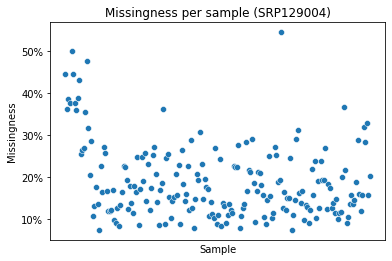

In [11]:
sns.set_style(rc = {'axes.facecolor': 'white'})
sns.scatterplot(data=missing_s, x="#IID", y="F_MISS")
plt.xticks([])
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.title("Missingness per sample (SRP129004)")
plt.ylabel("Missingness")
plt.xlabel("Sample")


Text(0.5, 1.0, 'Histogram of Missingness per sample (SRP129004)')

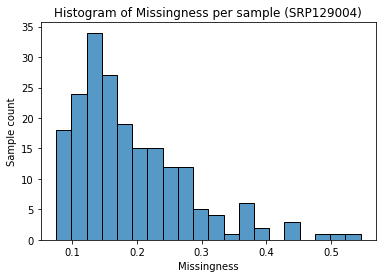

In [12]:
sns.set_style(rc = {'axes.facecolor': 'white'})
sns.histplot(data=missing_s, x="F_MISS", bins=20)
plt.ylabel("Sample count")
plt.xlabel("Missingness")
plt.title("Histogram of Missingness per sample (SRP129004)")
# plt.xlabel("Sample")

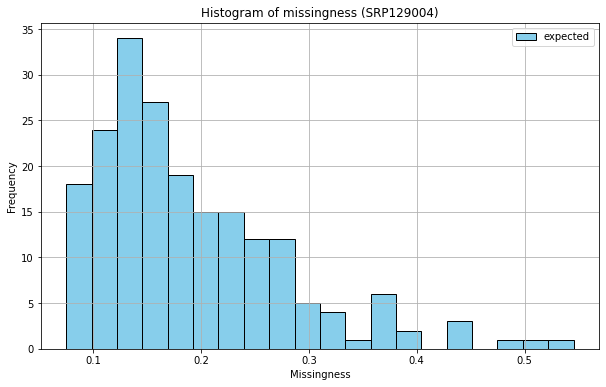

In [13]:
missingness = missing_s['F_MISS']

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(missingness, bins=20, color='skyblue', edgecolor='black', label="expected")
plt.legend()
plt.xlabel('Missingness')
plt.ylabel('Frequency')
plt.title('Histogram of missingness (SRP129004)')
plt.grid(True)
plt.show()

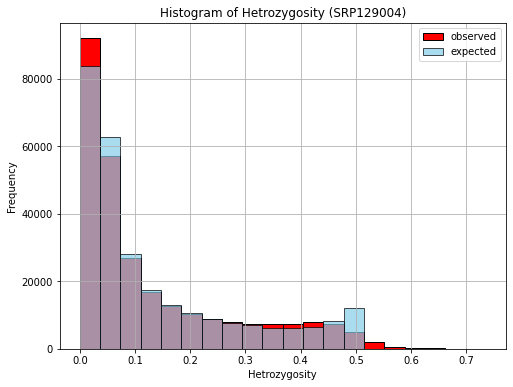

In [40]:
# Extract the p-values column
found_hetrozygosity = hwe['O(HET_A1)']
expected_hetrozygosity = hwe['E(HET_A1)']

min_value = min(min(expected_hetrozygosity), min(found_hetrozygosity))
max_value = max(max(expected_hetrozygosity), max(found_hetrozygosity))

# Plot the histogram
plt.figure(figsize=(8, 6), facecolor='white')
plt.hist(found_hetrozygosity, bins=20, range=(min_value, max_value), color='red', edgecolor='black', label="observed")
plt.hist(expected_hetrozygosity, bins=20, range=(min_value, max_value), color='skyblue', edgecolor='black', label="expected", alpha=0.7)
plt.legend()
plt.xlabel('Hetrozygosity')
plt.ylabel('Frequency')
plt.title('Histogram of Hetrozygosity (SRP129004)')
plt.grid(True)
plt.show()

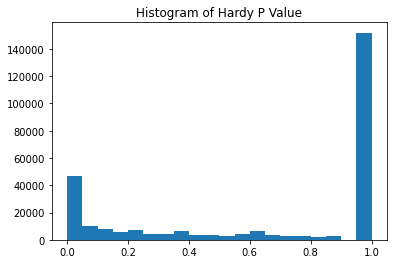

In [52]:
hwe_p = hwe["P"]

plt.hist(hwe_p, bins=20)
plt.title("Histogram of Hardy P Value")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


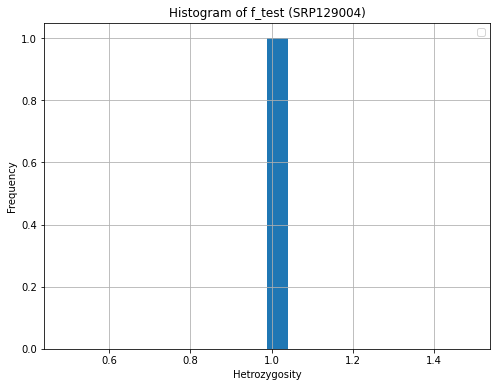

In [56]:
import scipy.stats as stats 
found_hetrozygosity = hwe['O(HET_A1)']
expected_hetrozygosity = hwe['E(HET_A1)']

variance1 = np.var(found_hetrozygosity, ddof=1)
variance2 = np.var(expected_hetrozygosity, ddof=1)

f_test = variance1 / variance2

# Plot the histogram
plt.figure(figsize=(8, 6), facecolor='white')
plt.hist(f_test, bins=20)
plt.legend()
plt.xlabel('Hetrozygosity')
plt.ylabel('Frequency')
plt.title('Histogram of f_test (SRP129004)')
plt.grid(True)
plt.show()

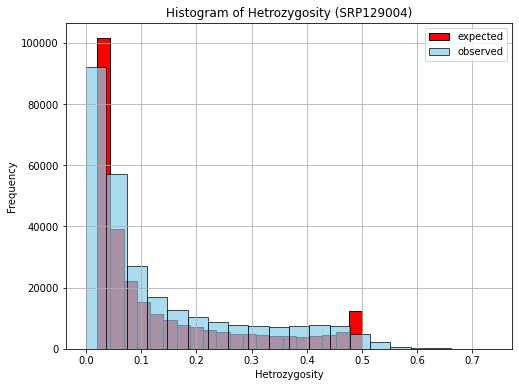

In [40]:
# Plot the histogram
plt.figure(figsize=(8, 6), facecolor='white')
plt.hist(expected_hetrozygosity, bins=20, color='red', edgecolor='black', label="expected")
plt.hist(found_hetrozygosity, bins=20, color='skyblue', edgecolor='black', label="observed", alpha=0.7)
plt.legend()
plt.xlabel('Hetrozygosity')
plt.ylabel('Frequency')
plt.title('Histogram of Hetrozygosity (SRP129004)')
plt.grid(True)
plt.show()

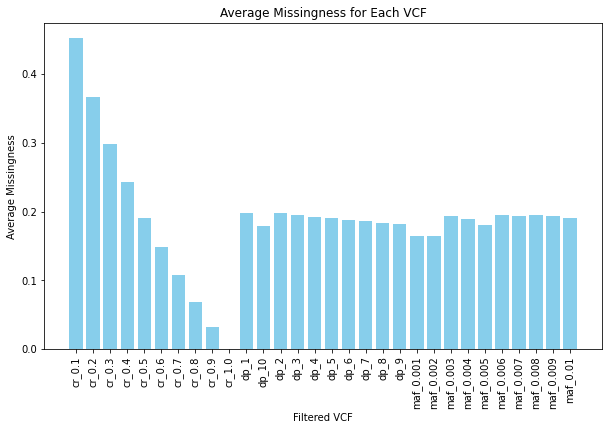

In [39]:
# Sort dictionary items by keys
sorted_dataframes = dict(sorted(dataframes.items()))

# Calculate and plot average F_MISS for each dataframe
colors = ['skyblue'] * len(sorted_dataframes)  # Specify a single color for all bars
plt.figure(figsize=(10, 6), facecolor='white')  # Set the size of the plot
plt.bar(sorted_dataframes.keys(), [df['F_MISS'].mean() for df in sorted_dataframes.values()], color=colors, align='center')

plt.xlabel('Filtered VCF')
plt.ylabel('Average Missingness')
plt.title('Average Missingness for Each VCF')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 45 degrees
plt.show()

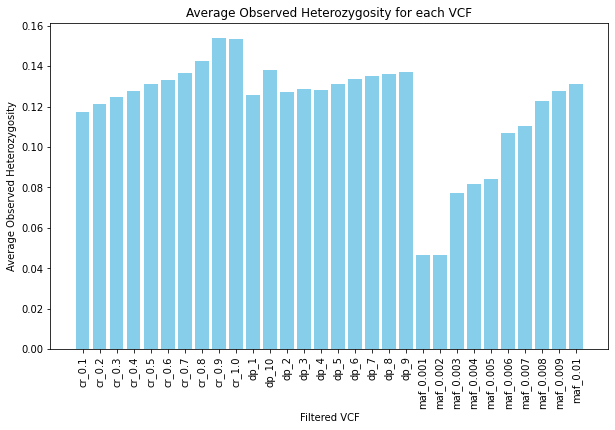

In [44]:
# Sort dictionary items by keys
sorted_dataframes_hardy = dict(sorted(dataframes_hardy.items()))

# Calculate and plot average F_MISS for each dataframe
colors = ['skyblue'] * len(sorted_dataframes_hardy)  # Specify a single color for all bars
plt.figure(figsize=(10, 6), facecolor='white')  # Set the size of the plot
plt.bar(sorted_dataframes_hardy.keys(), [df['O(HET_A1)'].mean() for df in sorted_dataframes_hardy.values()], color=colors, align='center')

plt.xlabel('Filtered VCF')
plt.ylabel('Average Observed Heterozygosity')
plt.title('Average Observed Heterozygosity for each VCF')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 45 degrees
plt.show()

/tmp/ipykernel_87591/4113510209.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = gt_df.applymap(categorize_genotype)


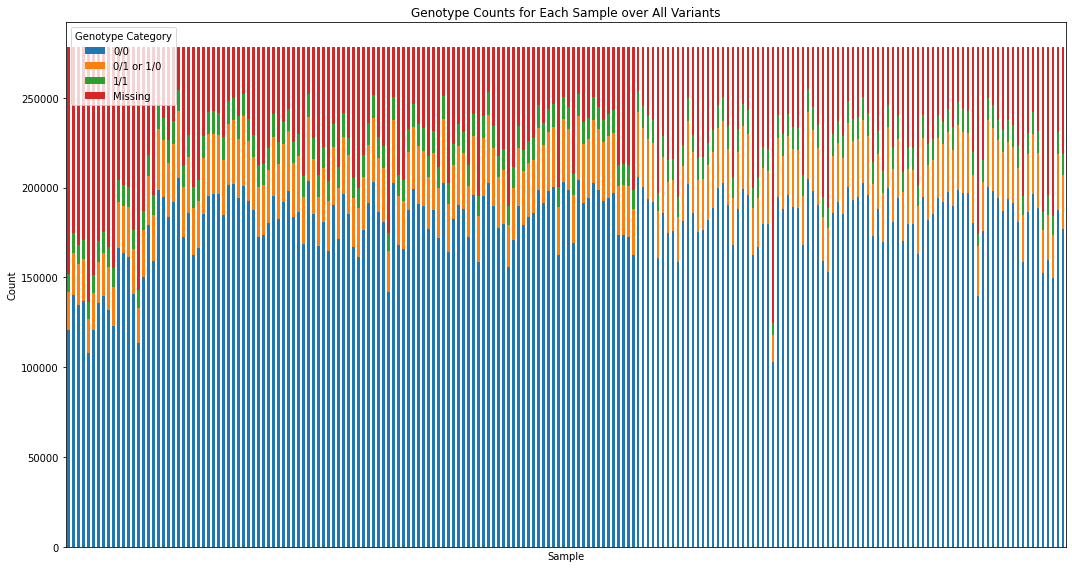

In [34]:
# Define a function to categorize genotypes
def categorize_genotype(gt):
    if gt in ['0/0', '0|0']:
        return '0/0'
    elif gt in ['0/1', '1/0', '0|1', '1|0']:
        return '0/1 or 1/0'
    elif gt == '1/1':
        return '1/1'
    else:
        return 'Missing'

# Apply the categorize_genotype function element-wise to each column
df_categorized = gt_df.applymap(categorize_genotype)

# Count occurrences of each category for each sample
counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

# Plot histogram for each sample over all variants
counts_per_sample.T.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Genotype Counts for Each Sample over All Variants')
plt.legend(title='Genotype Category')
plt.xticks([])
plt.tight_layout()
plt.show()

/tmp/ipykernel_87591/3361510541.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = gt_df.applymap(categorize_genotype)


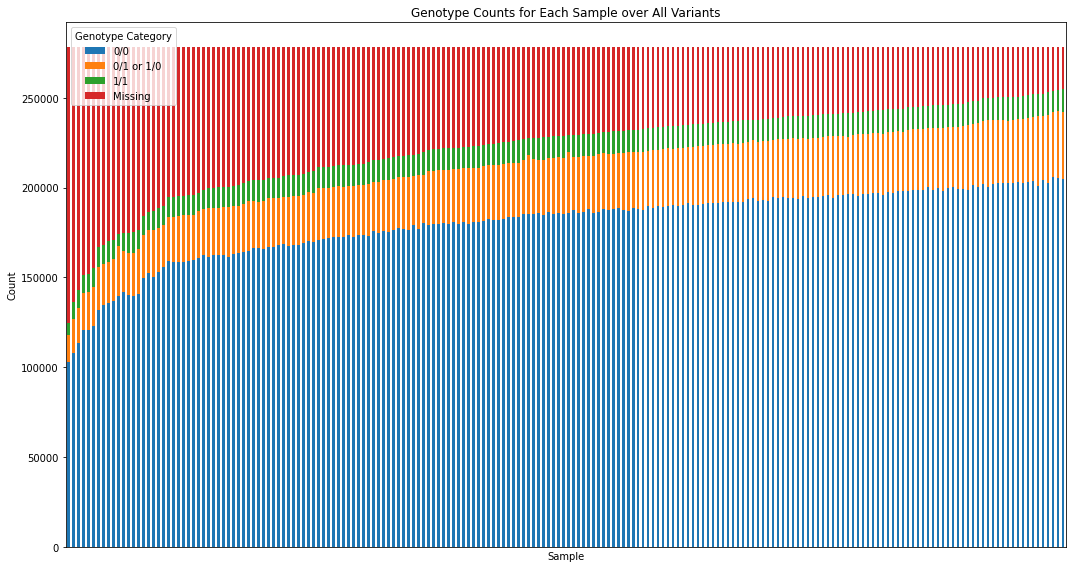

In [32]:
# Apply the categorize_genotype function element-wise to each column
df_categorized = gt_df.applymap(categorize_genotype)

# Count occurrences of each category for each sample
counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

# Calculate total count of missing values for each sample
missing_counts = counts_per_sample.loc['Missing']

# Sort samples based on total count of missing values
sorted_samples = missing_counts.sort_values(ascending=False).index

# Reindex the DataFrame to ensure alignment
counts_per_sample = counts_per_sample.reindex(sorted_samples, axis=1)

# Plot histogram for each sample over all variants
counts_per_sample.T.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Genotype Counts for Each Sample over All Variants')
plt.legend(title='Genotype Category')
plt.xticks([])
plt.tight_layout()
plt.show()

/tmp/ipykernel_87591/1208646614.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_categorized = gt_df.applymap(categorize_genotype)


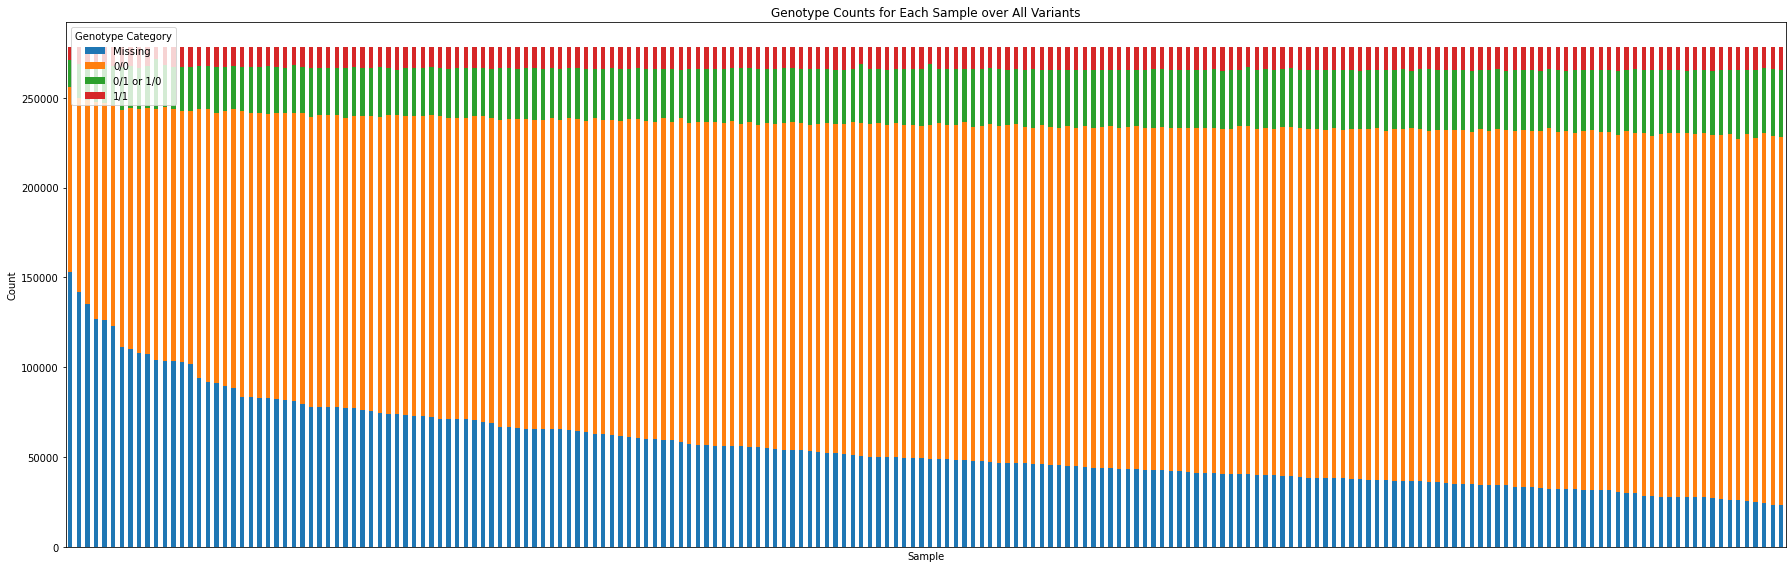

In [37]:
# Apply the categorize_genotype function element-wise to each column
df_categorized = gt_df.applymap(categorize_genotype)

# Count occurrences of each category for each sample
counts_per_sample = df_categorized.apply(pd.Series.value_counts, axis=0).fillna(0)

# Calculate total count of missing values for each sample
missing_counts = counts_per_sample.loc['Missing']

# Sort samples based on total count of missing values
sorted_samples = missing_counts.sort_values(ascending=False).index

# Reorder columns in the DataFrame with missing value category at the bottom
counts_per_sample = counts_per_sample[sorted_samples.tolist()]

# Define the order of genotype categories for stacking
genotype_order = ['Missing', '0/0', '0/1 or 1/0', '1/1']

counts_per_sample.T[genotype_order].plot(kind='bar', stacked=True, figsize=(25, 8))
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Genotype Counts for Each Sample over All Variants')
plt.legend(title='Genotype Category', loc='upper left')
plt.xticks([])
plt.tight_layout()
plt.show()

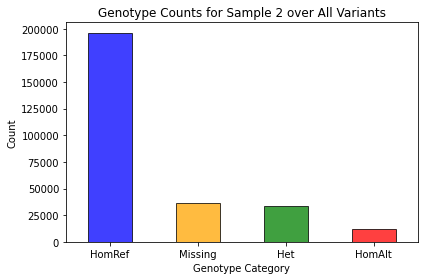

In [24]:
# Define a function to categorize genotypes
def categorize_genotype(gt):
    if gt in ['0/0', '0|0']:
        return 'HomRef'
    elif gt in ['0/1', '1/0', '0|1', '1|0']:
        return 'Het'
    elif gt == '1/1':
        return 'HomAlt'
    else:
        return 'Missing'

# Apply the categorize_genotype function element-wise to the first column
df_categorized = gt_df[30].apply(categorize_genotype)

# Count occurrences of each genotype category
counts = df_categorized.value_counts()

# Plot histogram
counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'], alpha=0.75, edgecolor='black')
plt.xlabel('Genotype Category')
plt.ylabel('Count')
plt.title('Genotype Counts for Sample 30 over All Variants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

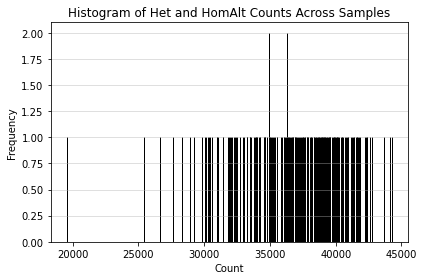

In [25]:
counts = gt_df.apply(lambda col: col[col.isin(['0/1', '1/0', '1/1'])].count())

# Plot histogram
plt.hist(counts, bins=range(int(counts.min()), int(counts.max()) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Het and HomAlt Counts Across Samples')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

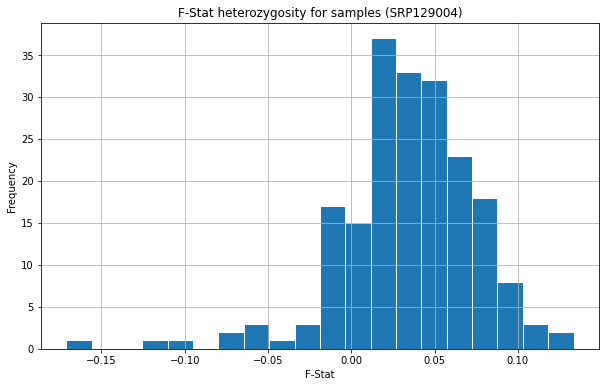

In [23]:
het_f = het["F"]

plt.figure(figsize=(10, 6), facecolor='white')  # Set the size of the plot
plt.hist(het_f, bins=20, ec='white')
plt.title("F-Stat heterozygosity for samples (SRP129004)")
plt.xlabel("F-Stat")
plt.ylabel("Frequency")
plt.grid()
plt.show()

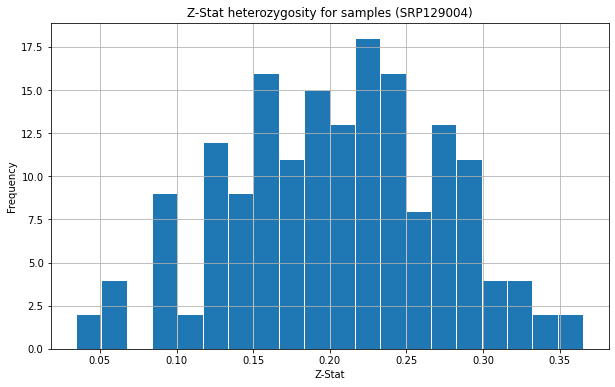

In [24]:
z_stat = np.sqrt(het_f)

plt.figure(figsize=(10, 6), facecolor='white')  # Set the size of the plot
plt.hist(z_stat, bins=20, ec='white')
plt.title("Z-Stat heterozygosity for samples (SRP129004)")
plt.xlabel("Z-Stat")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [25]:
het.head(3)

,#IID,O(HOM),E(HOM),O(HET),E(HET),OBS_CT,F
0,SRR6467549,133185,132046,21135,22274.2,154320,0.051146
1,SRR6467550,153929,152139,23439,25228.8,177368,0.070943
2,SRR6467551,147742,146257,23085,24570.0,170827,0.060441


(195, 7) (200, 7)


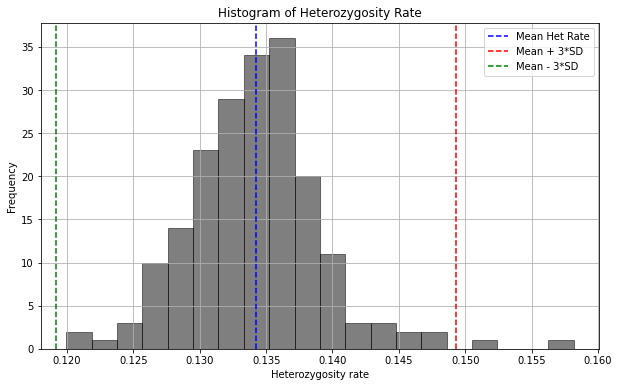

In [49]:
het_og = pd.read_table("/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/SRP129004/genotyping_output/heterozygosity_output.het", sep="\s+")

# Read the values from the text file
with open('/scratch/hb-functionalgenomics/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/QCPipeline/test.txt', 'r') as file:
    values_to_match = file.read().splitlines()

# Filter the DataFrame based on matching values in the first column
het = het_og[het_og.iloc[:, 0].isin(values_to_match)].copy()

print(het.shape, het_og.shape)

# calculate Het_Rate
het["Het_Rate"] = (het["OBS_CT"] - het["O(HOM)"]) / het["OBS_CT"]

# Calculate mean and standard deviation of het_rate
mean_het_rate = het["Het_Rate"].mean()
std_dev_het_rate = het["Het_Rate"].std()

# return samples that deviate too much from the mean. To be thrown away.
het_fail_samples = het[(het["Het_Rate"] < mean_het_rate - 3 * std_dev_het_rate) | (het["Het_Rate"] > mean_het_rate + 3 * std_dev_het_rate)]
het_fail_samples_only = het_fail_samples["#IID"]
# het_fail_samples.to_csv('HeterozygosityFailed.txt', sep='\t', index=False)
# het_fail_samples_only.to_csv('HeterozygosityFailedSamplesOnly.txt', sep='\t', index=False, header=None)

# Plot histogram
plt.figure(figsize=(10, 6), facecolor="white")
plt.hist(het["Het_Rate"], color="#000000", alpha=0.5, bins=20, edgecolor='black')

# Add vertical lines for mean and ±3 standard deviations
plt.axvline(mean_het_rate, color='blue', linestyle='--', label='Mean Het Rate')
plt.axvline(mean_het_rate + 3 * std_dev_het_rate, color='red', linestyle='--', label='Mean + 3*SD')
plt.axvline(mean_het_rate - 3 * std_dev_het_rate, color='green', linestyle='--', label='Mean - 3*SD')

# Set labels and title
plt.xlabel("Heterozygosity rate")
plt.ylabel("Frequency")
plt.title("Histogram of Heterozygosity Rate")
plt.legend()

# Display the plot
plt.grid(True)
# plt.savefig('HetCheck.png', bbox_inches='tight')